In [1]:
import random
import numpy as np

In [2]:
import pandas as pd

In [3]:
# read data from file
df = pd.read_csv('tempm.csv', header=None)
df.head(5)

,0,1
0,2014-09-26T03:50:00,14.0
1,2014-08-10T05:00:00,14.0
2,2014-08-21T22:50:00,12.0
3,2014-08-17T13:20:00,16.0
4,2014-08-06T01:20:00,14.0


In [4]:
import matplotlib
%matplotlib inline

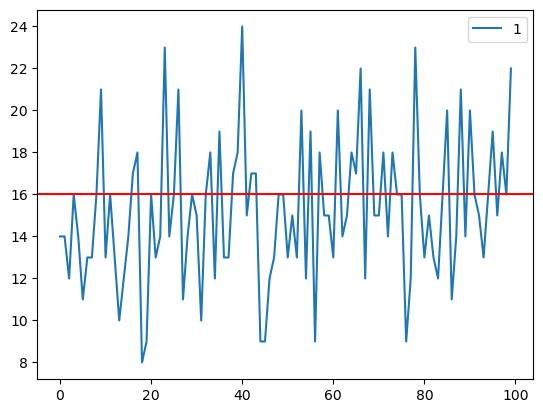

In [5]:
ax = df[:100].plot()
ax.axhline(16, color='r', linestyle='-')

In [6]:
# loc works on labels in the index.
# iloc works on the positions in the index (so it only takes integers).
# ix usually tries to behave like loc but falls back to behaving like iloc if the label is not in the index.

In [7]:
df.columns = ['timestamp', 'temperature']
df.head(3)

,timestamp,temperature
0,2014-09-26T03:50:00,14.0
1,2014-08-10T05:00:00,14.0
2,2014-08-21T22:50:00,12.0


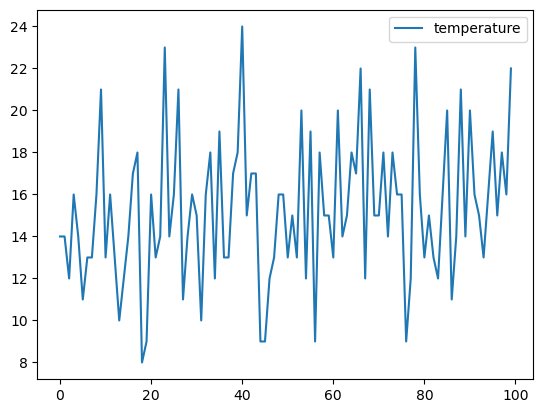

In [8]:
ax = df[:100].plot()

In [9]:
def to_fahrenheit(celsius):
    return (celsius * 9./5.) + 32.

In [10]:
#convert Celcius to fahrenheit
df['temperature'].map(to_fahrenheit)[:5]

0    57.2
1    57.2
2    53.6
3    60.8
4    57.2
Name: temperature, dtype: float64

In [11]:
#Add extra column wiht fahrenheit
df['temperature F'] = df['temperature'].map(to_fahrenheit)
df.head(5)

,timestamp,temperature,temperature F
0,2014-09-26T03:50:00,14.0,57.2
1,2014-08-10T05:00:00,14.0,57.2
2,2014-08-21T22:50:00,12.0,53.6
3,2014-08-17T13:20:00,16.0,60.8
4,2014-08-06T01:20:00,14.0,57.2


In [12]:
#not usable , entries are not recongized as timestamps
df.groupby('timestamp').count()

,temperature,temperature F
timestamp,,
2014-08-01T00:00:00,1,1
2014-08-01T00:20:00,1,1
2014-08-01T00:50:00,1,1
2014-08-01T01:00:00,1,1
2014-08-01T01:20:00,1,1
...,...,...
2014-09-30T22:20:00,1,1
2014-09-30T22:50:00,1,1
2014-09-30T23:00:00,1,1


In [13]:
#for completeness we add a deviation column
df['deviation'] = df['temperature'] - df['temperature'].mean()
df.head()

,timestamp,temperature,temperature F,deviation
0,2014-09-26T03:50:00,14.0,57.2,-1.590951
1,2014-08-10T05:00:00,14.0,57.2,-1.590951
2,2014-08-21T22:50:00,12.0,53.6,-3.590951
3,2014-08-17T13:20:00,16.0,60.8,0.409049
4,2014-08-06T01:20:00,14.0,57.2,-1.590951


<Axes: >

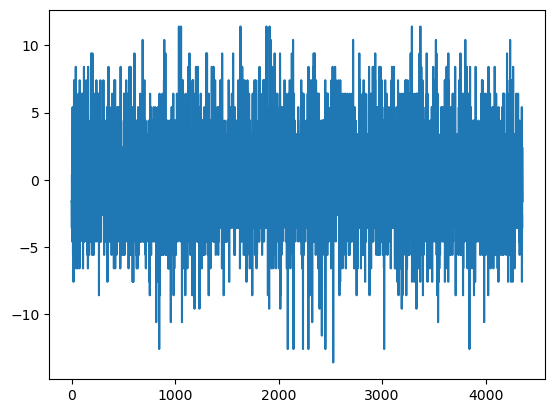

In [14]:
df['deviation'].plot()

In [15]:
# the plot is not userfriendly

In [16]:
#convert the timestamp column 
# create TimeSeries Index
df.index = pd.to_datetime(df['timestamp'])

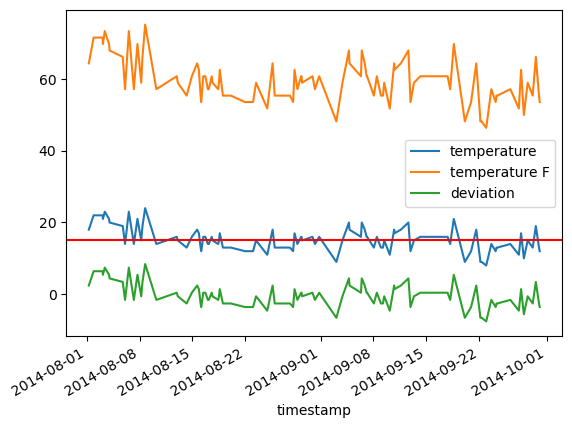

In [17]:
#standaard plot eerste 100
ax = df[:100].plot()
ax.axhline(df[:100]['temperature'].mean(), color='r', linestyle='-')

In [18]:
df.head()

,timestamp,temperature,temperature F,deviation
timestamp,,,,
2014-09-26 03:50:00,2014-09-26T03:50:00,14.0,57.2,-1.590951
2014-08-10 05:00:00,2014-08-10T05:00:00,14.0,57.2,-1.590951
2014-08-21 22:50:00,2014-08-21T22:50:00,12.0,53.6,-3.590951
2014-08-17 13:20:00,2014-08-17T13:20:00,16.0,60.8,0.409049
2014-08-06 01:20:00,2014-08-06T01:20:00,14.0,57.2,-1.590951


In [19]:
df.index.view

<bound method Index.view of DatetimeIndex(['2014-09-26 03:50:00', '2014-08-10 05:00:00',
               '2014-08-21 22:50:00', '2014-08-17 13:20:00',
               '2014-08-06 01:20:00', '2014-09-27 06:50:00',
               '2014-08-25 21:50:00', '2014-08-14 05:20:00',
               '2014-09-14 05:20:00', '2014-08-03 02:50:00',
               ...
               '2014-08-22 10:00:00', '2014-09-10 16:20:00',
               '2014-08-14 15:50:00', '2014-09-05 04:00:00',
               '2014-09-29 02:50:00', '2014-08-21 01:50:00',
               '2014-09-13 10:00:00', '2014-08-16 23:20:00',
               '2014-09-28 10:20:00', '2014-09-25 18:20:00'],
              dtype='datetime64[ns]', name='timestamp', length=4357, freq=None)>

In [20]:
#groeperen per dag 
df.groupby(df.index.date).count().head()

,timestamp,temperature,temperature F,deviation
2014-08-01,72,72,72,72
2014-08-02,72,72,72,72
2014-08-03,70,70,70,70
2014-08-04,72,72,72,72
2014-08-05,68,68,68,68


## Cleanup of Data

In [21]:
df.dropna()
df.isnull().any()

timestamp        False
temperature       True
temperature F     True
deviation         True
dtype: bool

In [22]:
df.dropna(inplace=True)
df.isnull().any()

timestamp        False
temperature      False
temperature F    False
deviation        False
dtype: bool

In [23]:
#we maken een 2 extra column op basis van de index
#dag nummer en of dit een weekend dag is.
df['weekday'] = df.index.weekday
df['weekend'] = df['weekday'].isin({5, 6})
df.head()

,timestamp,temperature,temperature F,deviation,weekday,weekend
timestamp,,,,,,
2014-09-26 03:50:00,2014-09-26T03:50:00,14.0,57.2,-1.590951,4,False
2014-08-10 05:00:00,2014-08-10T05:00:00,14.0,57.2,-1.590951,6,True
2014-08-21 22:50:00,2014-08-21T22:50:00,12.0,53.6,-3.590951,3,False
2014-08-17 13:20:00,2014-08-17T13:20:00,16.0,60.8,0.409049,6,True
2014-08-06 01:20:00,2014-08-06T01:20:00,14.0,57.2,-1.590951,2,False


<Axes: xlabel='timestamp'>

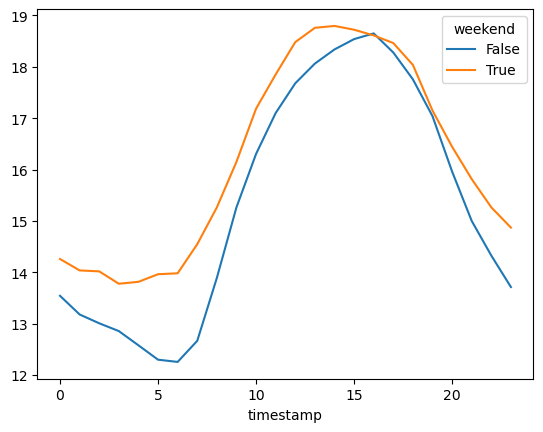

In [24]:
df.groupby(['weekend', df.index.hour])['temperature'].mean().unstack(level=0).plot()

<Axes: xlabel='timestamp'>

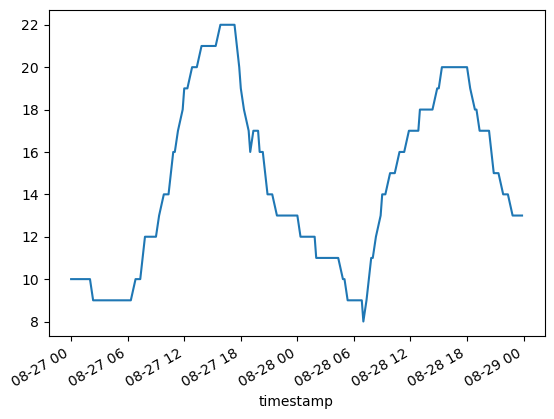

In [25]:
# selecting ranges
df["2014-08-27":"2014-08-28"]['temperature'].plot()

<Axes: xlabel='timestamp'>

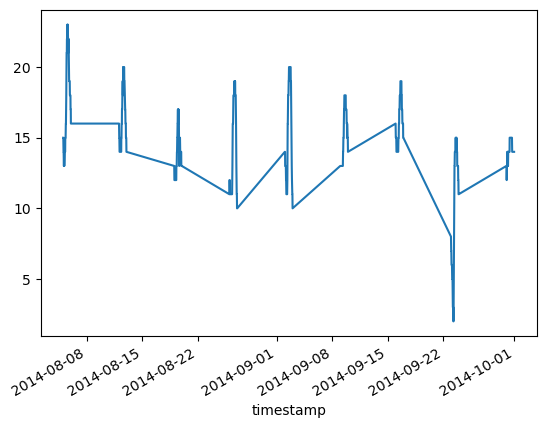

In [26]:
# plotting only weekdays
df[df.index.weekday == True]['temperature'].plot()

<Axes: xlabel='timestamp'>

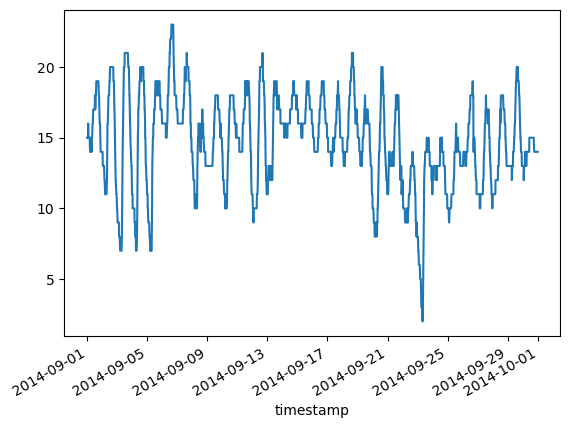

In [27]:
#plot a specific month
df.loc['2014-09']['temperature'].plot()

In [28]:
df[(df.index.hour > 12) & (df.index.hour <=16)]['temperature'].count()

722

## Resampling 

In [29]:
#On a day basis find the max temp
df.resample('D').max().head()

,timestamp,temperature,temperature F,deviation,weekday,weekend
timestamp,,,,,,
2014-08-01,2014-08-01T23:50:00,25.0,77.0,9.409049,4,False
2014-08-02,2014-08-02T23:50:00,27.0,80.6,11.409049,5,True
2014-08-03,2014-08-03T23:50:00,25.0,77.0,9.409049,6,True
2014-08-04,2014-08-04T23:50:00,24.0,75.2,8.409049,0,False
2014-08-05,2014-08-05T23:50:00,23.0,73.4,7.409049,1,False


In [30]:
#mean temp op monthlybasis
df['temperature'].resample('M').mean().head()

timestamp
2014-08-31    16.436652
2014-09-30    14.719216
Freq: M, Name: temperature, dtype: float64

In [31]:
#mean temp op 3 Day basis
df['temperature'].resample('3D').mean()

timestamp
2014-08-01    21.953271
2014-08-04    18.580189
2014-08-07    19.037037
2014-08-10    18.155660
2014-08-13    16.286385
2014-08-16    14.449074
2014-08-19    14.004630
2014-08-22    13.273148
2014-08-25    14.166667
2014-08-28    14.840376
2014-08-31    15.718310
2014-09-03    14.446009
2014-09-06    16.476852
2014-09-09    15.239437
2014-09-12    15.621495
2014-09-15    16.051402
2014-09-18    14.888372
2014-09-21    11.640187
2014-09-24    13.324074
2014-09-27    14.222222
2014-09-30    14.125000
Freq: 3D, Name: temperature, dtype: float64

<Axes: xlabel='timestamp'>

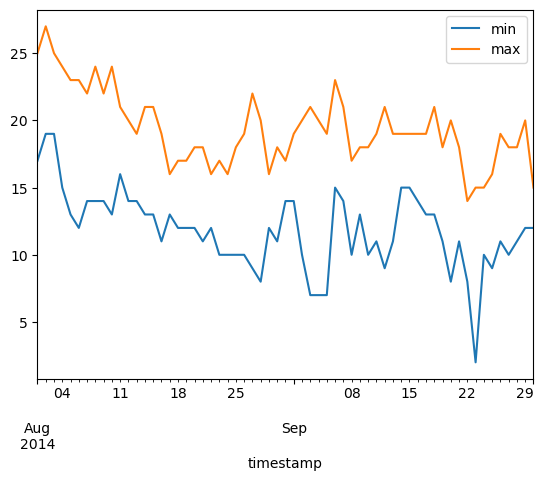

In [32]:
df['temperature'].resample('D').agg(['min', 'max']).plot()

In [33]:
df['temperature'][:2]

timestamp
2014-09-26 03:50:00    14.0
2014-08-10 05:00:00    14.0
Name: temperature, dtype: float64

In [34]:
new_index = df.index.shift(2, freq="H")
df.set_index(new_index, inplace=True)

In [35]:
df['temperature'][:2]

timestamp
2014-09-26 05:50:00    14.0
2014-08-10 07:00:00    14.0
Name: temperature, dtype: float64